# Democracy and Income 

Democracy and economic prosperity go hand in hand. Countless studies have shown that in cross-sectional data (data across time and location) there exists a very siginificant correlation between income and democracy. However, whether democracy directly causes income growth is a more contentious matter. With a few exceptions, it is true that most rich countries are democracies, but this is likely due to imperfect models not accounting for issues like reverse causality and confounding variables. Using the instrument variable tenchnique to establish causality and PANEL methods to control in-country variation, we show that democracy in fact does not have a positive impact on income.

### Importing needed libraries

In [1]:
import numpy as np
import linearmodels
from linearmodels import PanelOLS
from linearmodels import OLS
import statsmodels.api as sm
import numpy as np
import linearmodels
from linearmodels import IV2SLS 
from linearmodels import IVGMM
from linearmodels import OLS
from linearmodels import PanelOLS
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## About Our Dataset

I compiled this dataset from sources such as the World Bank, the International Monetary Fund, and the Federal Reserve. It features various economic and social factors such as GDP, trade, corruption, literacy, etc. This data spans 131 countries over the course of 11 years, from 2006 to 2016. In this project, the focus will only be on 3 variables:
    
First we have **LN_INCOMEPC**: The natural log of income per capita. Traditionally, in econometrics, income per capita is logged to convert it into a psuedo growth rate. This is done to minimize the otherwise large differences across countries in income per capita, and in many ways, growth of income per capita is a better measure of prosperity. Data is taken from the [World Bank](https://data.worldbank.org/indicator/NY.GDP.PCAP.PP.KD) and is in constant 2011 dollars. 

Next, we have **EIU** - our measure of democracy. EIU is the Economist's measure of democracy. It is not an unbiased measure of democratic institutions like the [Polity IV index.](https://www.systemicpeace.org/polity/polity4.htm) EIU also includes cultural aspects like apathy toward government, trust, access to media, and contested elections (see [EIU methodology on pg 48](https://www.prensa.com/politica/democracy-index_LPRFIL20190112_0001.pdf)). This, however, has the drawback of capturing social and economic elements in addition to just democracy. Access to media and trust can be correlated with stability, hence our democracy measure captures more than just democracy. For instance, a country in which the people trust their government is likely to be one in which the government is doing a good job, which would likely be correlated with higher income per capita. Some things, like contested elections and apathy, we want to capture, but not stability. To control for this, we need a third variable.

Our final variable is **LAW**. Rule of law attempts to capture the extent to which people obey laws and trust the government itself. Specifically, it looks at how well contracts are enforced, how honest the police and courts are, and how likely crime is. This captures the "trust in government" part of EIU which we do not want to count as democracy. Adding Law to our regression allows us to compare countries with different levels of democracy but similar levels of stability. The data is taken from the [World Bank](http://info.worldbank.org/governance/wgi/Home/Documents).

It is important to note that the latter two are indices compiled from surveys or judged by so-called experts, and hence have a layer of subjectivity. However, the Economist and the World Bank are both experienced and well-respected in their fields, so we can have a strong degree of confidence in these measures.

In [2]:
import numpy as np
import pandas as pd

data = pd.read_csv(r'C:\Users\Viral Shanker\Desktop\Combined2016new3.csv')
data.head()
j = (pd.get_dummies(data["code"]))
data1 = pd.concat([data, j], axis = 1)
j = data1.columns
j.drop("BOL")
cs = j[97:]
t = ['2', '3', '4', '5', '6', '7', '8', '9', '10', '11']
data["logInvestment"] = np.log(data["Investment"])
data["EIU"] = data["eiu"]

### We first do basic OLS regression. We regress LN_INCOMEPC on LAW and EIU

In [3]:
mod = OLS(data.LN_INCOMEPC, data[["eiu", "LAW", "constant"]])
res = mod.fit()
res.summary

<class 'linearmodels.compat.statsmodels.Summary'>
"""
                            OLS Estimation Summary                            
==============================================================================
Dep. Variable:            LN_INCOMEPC   R-squared:                      0.6972
Estimator:                        OLS   Adj. R-squared:                 0.6967
No. Observations:                1420   F-statistic:                    5884.2
Date:                Sat, Oct 19 2019   P-value (F-stat)                0.0000
Time:                        21:51:46   Distribution:                  chi2(2)
Cov. Estimator:                robust                                         
                                                                              
                             Parameter Estimates                              
==============================================================================
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
eiu            0.1216     0.0208     5.8356     0.0000      0.0808      0.1624
LAW            4.6173     0.1703     27.113     0.0000      4.2835      4.9510
constant       5.2779     0.0690     76.437     0.0000      5.1426      5.4132
==============================================================================
"""

### LN_INCOMEPC is positively correlated with LAW and EIU

We have both LAW and EIU being positively correlated with income, LAW far more so with a large coefficient and massive t-statistic, but EIU is also positive and very significant. Now, we try without LAW and do a basic regression of income on democracy to get a point of reference.

In [4]:
mod = OLS(data.LN_INCOMEPC, data[["eiu", "constant"]])
res = mod.fit()
res.summary

<class 'linearmodels.compat.statsmodels.Summary'>
"""
                            OLS Estimation Summary                            
==============================================================================
Dep. Variable:            LN_INCOMEPC   R-squared:                      0.5359
Estimator:                        OLS   Adj. R-squared:                 0.5355
No. Observations:                1420   F-statistic:                    1558.8
Date:                Sat, Oct 19 2019   P-value (F-stat)                0.0000
Time:                        21:51:46   Distribution:                  chi2(1)
Cov. Estimator:                robust                                         
                                                                              
                             Parameter Estimates                              
==============================================================================
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
eiu            0.5247     0.0133     39.482     0.0000      0.4987      0.5508
constant       5.4002     0.0909     59.416     0.0000      5.2220      5.5783
==============================================================================
"""

### EIU is much larger

As expected, we get a strong positive correlation, and a very significant one at that. EIU's coefficient is around 5 times as big as it was in the previous regression, so clearly, LAW is doing its job and capturing part of EIU's effect. 

Now to visualize:

Text(0.5,1,'Income vs Democracy')

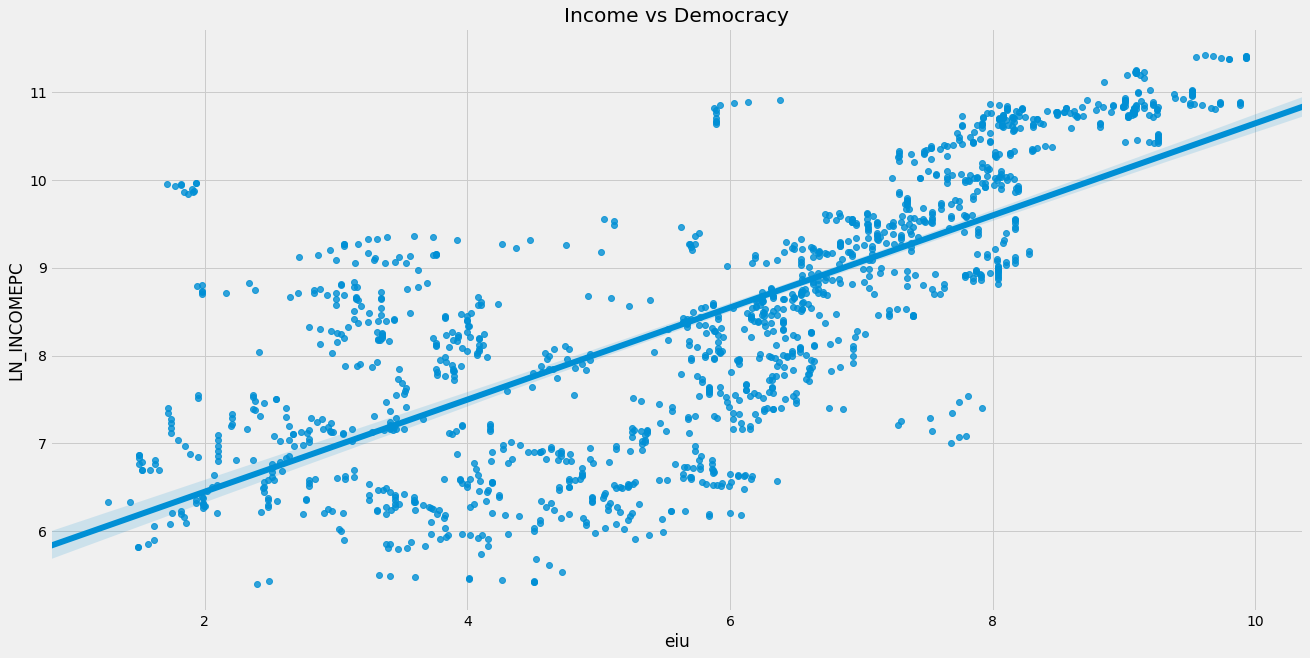

In [5]:
%matplotlib inline
import seaborn as sns
from matplotlib import pyplot as plt
plt.style.use("fivethirtyeight")
fig = plt.figure(figsize=(20,10))
sns.regplot(x = "eiu", y = "LN_INCOMEPC", data=data)
plt.title("Income vs Democracy")

### We can do better

Some issues are immediately obvious. First of all, we're treating every country/year combination as independent. For instance, 2006 Russia is bound to be very similar to 2007 Russia, so on the graph at least, one point per country is enough. It is misleading to treat each point as an independent entity.  
Regression-wise, we can try and account for the time-effects, and see what results we get. This means we have dummy variables for each year. Note that we drop the dummy variable of year 1 to avoid the dummy variable trap. 

In [6]:
mod = OLS(data.LN_INCOMEPC, data[["eiu", "constant",'2', '3', '4', '5', '6', '7', '8', '9', '10', '11']])
res = mod.fit()
res.summary

<class 'linearmodels.compat.statsmodels.Summary'>
"""
                            OLS Estimation Summary                            
==============================================================================
Dep. Variable:            LN_INCOMEPC   R-squared:                      0.5375
Estimator:                        OLS   Adj. R-squared:                 0.5339
No. Observations:                1420   F-statistic:                    1571.4
Date:                Sat, Oct 19 2019   P-value (F-stat)                0.0000
Time:                        21:51:47   Distribution:                 chi2(11)
Cov. Estimator:                robust                                         
                                                                              
                             Parameter Estimates                              
==============================================================================
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
eiu            0.5246     0.0133     39.493     0.0000      0.4986      0.5506
constant       5.2954     0.1256     42.174     0.0000      5.0493      5.5415
2              0.0336     0.1308     0.2571     0.7971     -0.2227      0.2900
3              0.0459     0.1303     0.3525     0.7245     -0.2095      0.3013
4              0.0517     0.1297     0.3983     0.6904     -0.2025      0.3058
5              0.1091     0.1298     0.8407     0.4005     -0.1453      0.3635
6              0.1174     0.1303     0.9009     0.3677     -0.1380      0.3727
7              0.1274     0.1297     0.9821     0.3260     -0.1268      0.3816
8              0.1419     0.1299     1.0920     0.2748     -0.1128      0.3966
9              0.1571     0.1292     1.2158     0.2241     -0.0962      0.4104
10             0.1689     0.1292     1.3072     0.1911     -0.0843      0.4221
11             0.2067     0.1287     1.6063     0.1082     -0.0455      0.4590
==============================================================================
"""

### Almost no change in terms of our predictions. We try again with LAW

In [7]:
mod = OLS(data.LN_INCOMEPC, data[["eiu", "LAW", "constant",'2', '3', '4', '5', '6', '7', '8', '9', '10', '11']])
res = mod.fit()
res.summary

<class 'linearmodels.compat.statsmodels.Summary'>
"""
                            OLS Estimation Summary                            
==============================================================================
Dep. Variable:            LN_INCOMEPC   R-squared:                      0.6995
Estimator:                        OLS   Adj. R-squared:                 0.6970
No. Observations:                1420   F-statistic:                    5896.7
Date:                Sat, Oct 19 2019   P-value (F-stat)                0.0000
Time:                        21:51:47   Distribution:                 chi2(12)
Cov. Estimator:                robust                                         
                                                                              
                             Parameter Estimates                              
==============================================================================
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
eiu            0.1197     0.0208     5.7636     0.0000      0.0790      0.1605
LAW            4.6368     0.1702     27.244     0.0000      4.3032      4.9704
constant       5.2305     0.1011     51.714     0.0000      5.0323      5.4288
2              0.0063     0.1092     0.0580     0.9537     -0.2077      0.2203
3             -0.0974     0.1085    -0.8982     0.3691     -0.3101      0.1152
4             -0.0291     0.1064    -0.2731     0.7848     -0.2376      0.1795
5              0.0208     0.1055     0.1972     0.8437     -0.1860      0.2276
6              0.0707     0.1060     0.6674     0.5045     -0.1370      0.2784
7              0.0469     0.1056     0.4438     0.6572     -0.1601      0.2538
8              0.0859     0.1052     0.8161     0.4144     -0.1204      0.2921
9              0.1222     0.1052     1.1611     0.2456     -0.0841      0.3285
10             0.1583     0.1052     1.5051     0.1323     -0.0478      0.3644
11             0.1403     0.1037     1.3531     0.1760     -0.0629      0.3435
==============================================================================
"""

### Very similar results again 

While it is certainly correct to include the time dummies, they do not seem to be altering our estimates too much. We can leverage our cross-sectional data more, however. 

### The Two-Way Panel

As we had dummies for time, we now add dummies for each country using the PANELOLS method. These fixed effects capture all unique variation within each country as well as across countries each year.  

In [39]:
data3 = data.set_index(['code','TIME_TREND'])
mod = PanelOLS(data3.LN_INCOMEPC, data3[["eiu", "LAW", "constant"]], time_effects = True, entity_effects = True)
res = mod.fit()
res.summary

Dep. Variable:,LN_INCOMEPC,R-squared:,0.1103
Estimator:,PanelOLS,R-squared (Between):,0.2517
No. Observations:,1420,R-squared (Within):,0.0676
Date:,"Sat, Oct 19 2019",R-squared (Overall):,0.2505
Time:,22:48:38,Log-likelihood,1808.0
Cov. Estimator:,Unadjusted,,
,,F-statistic:,79.182
Entities:,130,P-value,0.0000
Avg Obs:,10.923,Distribution:,"F(2,1278)"
Min Obs:,1.0000,,
Max Obs:,11.000,F-statistic (robust):,79.182


### Democracy is far less significant 

Once we account for each country individually, we find that democracy has almost no effect on income per capita. Its coefficient is an order of magnitude smaller than it was in the normal OLS and time-effects regressions. Note however, that EIU is still significant. 

### Two-Way Panel with only EIU

In [9]:
data3 = data.set_index(['code','TIME_TREND'])
mod = PanelOLS(data3.LN_INCOMEPC, data3[["eiu", "constant"]], time_effects = True, entity_effects = True)
res = mod.fit()
res.summary

Dep. Variable:,LN_INCOMEPC,R-squared:,0.0292
Estimator:,PanelOLS,R-squared (Between):,0.0818
No. Observations:,1420,R-squared (Within):,0.0227
Date:,"Sat, Oct 19 2019",R-squared (Overall):,0.0809
Time:,21:51:47,Log-likelihood,1746.1
Cov. Estimator:,Unadjusted,,
,,F-statistic:,38.465
Entities:,130,P-value,0.0000
Avg Obs:,10.923,Distribution:,"F(1,1279)"
Min Obs:,1.0000,,
Max Obs:,11.000,F-statistic (robust):,38.465


### Democracy is still very small

Democracy, even without LAW, remains small. Note that it is still very comparable to the regression with LAW in it. Most of the effects of LAW are captured by the time and country dummies. 

### Let's visualize average LN_INCOMEPC and average EIU to get an idea of where our countries fall

It becomes difficult to capture PANEL data in a graph due to the number of dimensions. Hidden in the above regression are 130 country dummies and 10 time dummies. Still, visualization gives us a better sense of our data, far more so than our first plot. To prepare the data, we group by country name and get average values over 11 years for all our columns. We now have as many rows as countries - 131. 

In [10]:
data2 = data

data2 = data2.groupby("Country", as_index = False).mean()

### Drop Bosnia 

We are actually missing EIU values for Bosnia, so we simply drop it. Previous graphs and regressions automatically drop missing values, but this time we need to manually do it.

In [11]:
data2 = data2[data2.Country != "Bosnia "]

### OLS regression again to get an idea of what to expect

In [12]:
mod = OLS(data2.LN_INCOMEPC, data2[["eiu", "constant"]])
res = mod.fit()
res.summary

<class 'linearmodels.compat.statsmodels.Summary'>
"""
                            OLS Estimation Summary                            
==============================================================================
Dep. Variable:            LN_INCOMEPC   R-squared:                      0.5484
Estimator:                        OLS   Adj. R-squared:                 0.5449
No. Observations:                 130   F-statistic:                    151.08
Date:                Sat, Oct 19 2019   P-value (F-stat)                0.0000
Time:                        21:51:47   Distribution:                  chi2(1)
Cov. Estimator:                robust                                         
                                                                              
                             Parameter Estimates                              
==============================================================================
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
eiu            0.5321     0.0433     12.291     0.0000      0.4473      0.6170
constant       5.3603     0.2959     18.115     0.0000      4.7803      5.9402
==============================================================================
"""

### Similar to original OLS

Again, very similar to our original OLS regression except for the lower t-stat, though still very significant.

In [13]:
#Source of label_point function: 
#https://stackoverflow.com/questions/46027653/adding-labels-in-x-y-scatter-plot-with-seaborn
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))

Text(0.5,1,'Average Income vs Average Democracy')

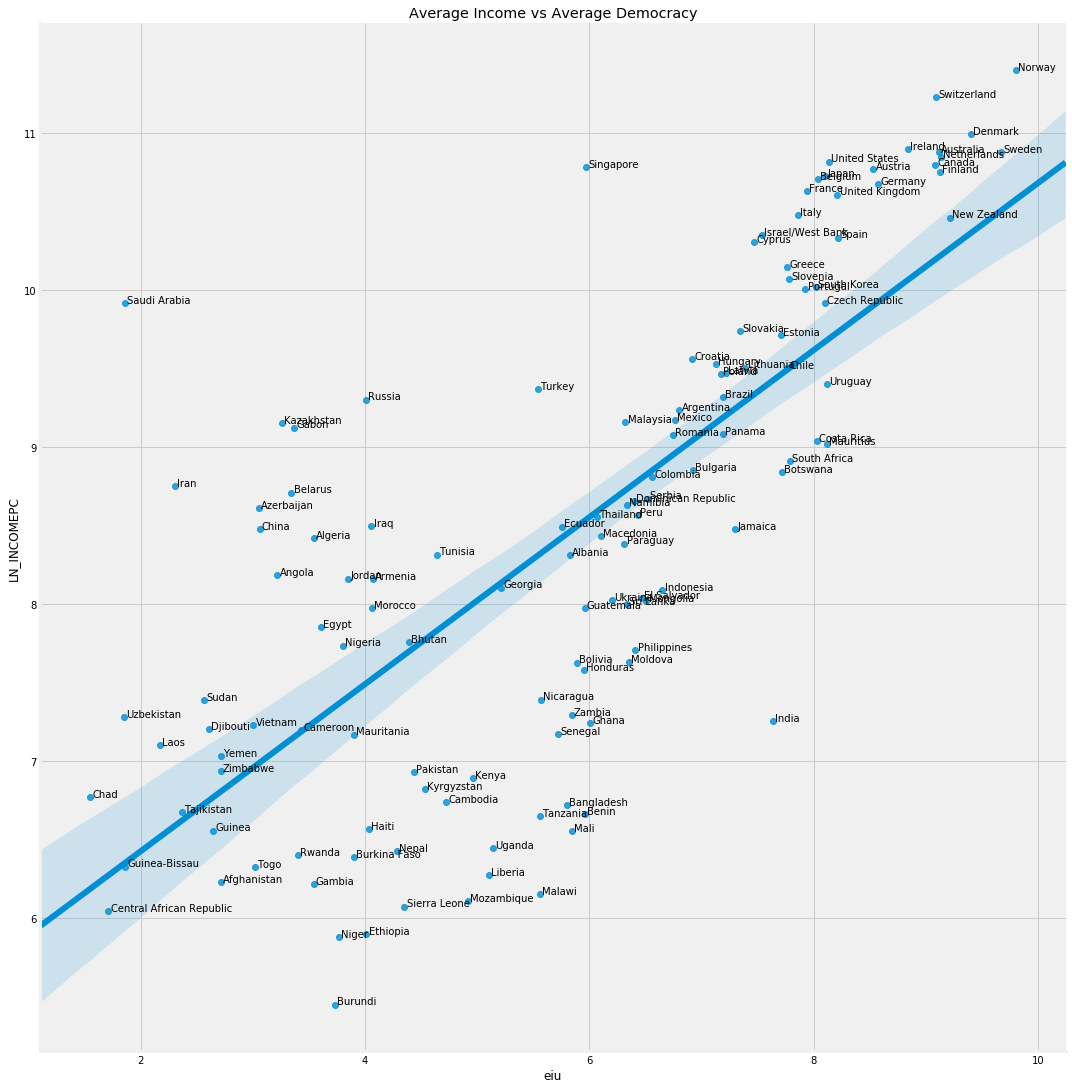

In [14]:
%matplotlib inline
ax = sns.lmplot(x = "eiu", y = "LN_INCOMEPC", data=data2, size = 15)
label_point(data2.eiu, data2.LN_INCOMEPC, data2.Country, plt.gca())
plt.title("Average Income vs Average Democracy")

### A much clearer graph

With the LN_INCOMEPC and EIU values averaged, we can label each point and get a very real sense of our data distribution. There are some obvious outliers, which make sense with some geopolitical context. Saudi Arabia is not democratic at all yet is prosperous, and India, while democratic, struggles when it comes to income per capita.

### Adding LAW to the averages regression

In [15]:
mod = OLS(data2.LN_INCOMEPC, data2[["eiu", "LAW", "constant"]])
res = mod.fit()
res.summary

<class 'linearmodels.compat.statsmodels.Summary'>
"""
                            OLS Estimation Summary                            
==============================================================================
Dep. Variable:            LN_INCOMEPC   R-squared:                      0.7058
Estimator:                        OLS   Adj. R-squared:                 0.7012
No. Observations:                 130   F-statistic:                    569.40
Date:                Sat, Oct 19 2019   P-value (F-stat)                0.0000
Time:                        21:51:48   Distribution:                  chi2(2)
Cov. Estimator:                robust                                         
                                                                              
                             Parameter Estimates                              
==============================================================================
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
eiu            0.1161     0.0695     1.6711     0.0947     -0.0201      0.2524
LAW            4.7102     0.5716     8.2403     0.0000      3.5899      5.8306
constant       5.2595     0.2238     23.498     0.0000      4.8209      5.6982
==============================================================================
"""

### Democracy insignificant

It is interesting to note that EIU becomes close to insignificant here. That said, given our small sample, these results overall hold less value than our full-sample regressions since our samples are down to 131 as opposed to 1420.

## Instrument Variable Regression 

The above methodologies make no claim at causation. It could be that there exist confounding variables, that is, variables we have not included in our regression that affect both democracy and income per capita, which can give biased results. Or, we may have a reverse causality issue where income causes democracy to go up, which in turn causes income to go up, and so on. The only known way to empirically measure causation is to use some variation of the [instrumental variable regression technique](http://cameron.econ.ucdavis.edu/e240a/ch04iv.pdf). We need an instrumental variable (IV) that satisfies two conditions:

* Relevancy: The IV we choose must be relevant to the endogenous (in our case, EIU). This is easily tested with a simple regression of EIU on our instrument. This known as our "first stage."

* Exclusion: (The tough one) The IV must be exogenous with respect to the y-variable (in our case, LN_INCOMEPC). There is no real statistical way to test for this. One must be able to argue that this is the case for the chosen instrument.

## Our Instrument: demoWar

demoWar is a simple dummy variable. demoWar is 1 if the country has gone to war with a democracy as defined by the Polity index, and a 0 otherwise. 

### First Stage Regression

In [16]:
mod = OLS(data.eiu, data[["demoWar", "constant"]])
res = mod.fit()
res.summary

<class 'linearmodels.compat.statsmodels.Summary'>
"""
                            OLS Estimation Summary                            
==============================================================================
Dep. Variable:                    eiu   R-squared:                      0.0504
Estimator:                        OLS   Adj. R-squared:                 0.0498
No. Observations:                1430   F-statistic:                    92.800
Date:                Sat, Oct 19 2019   P-value (F-stat)                0.0000
Time:                        21:51:48   Distribution:                  chi2(1)
Cov. Estimator:                robust                                         
                                                                              
                             Parameter Estimates                              
==============================================================================
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
demoWar       -1.1959     0.1241    -9.6333     0.0000     -1.4392     -0.9526
constant       5.9988     0.0632     94.930     0.0000      5.8750      6.1227
==============================================================================
"""

### It's Relevant

We get a t-statistic of -9.6, which is right around where we want it to be. Generally, a t-stat of 10 in the first stage is considered a strong instrument. This tells us that a country having gone to war with a democracy is correlated with that country being less democratic.

### Exogneity: And now we must leave the safe abode of statistics behind, and rely on logic and reasoning

The [Democratic Peace Theory](https://www.oxfordbibliographies.com/view/document/obo-9780199756223/obo-9780199756223-0014.xml) alleges that democracies are far less likely to go to war with one another than they are to go to war with non-democracies. Here we have a channel which shows demoWar directly affecting democracy. It is important to note that this effect is independent of income and stability. According to the theory, the mere fact of being a democracy is enough to dissuade others from going to war with them. This instrument has also been used in several other papers exploring the same issue, like [this](https://economics.mit.edu/files/5677). 

In theory at least, we have satisfied the exclusion restriction.

### The IV regression

We assume LAW is exogenous (this assumption is explored further on) and EIU is endogenous. Our instrument is demoWar. 

In [17]:
sample = IVGMM(data.LN_INCOMEPC, data[["constant", "LAW"]], data[["eiu"]], data["demoWar"])
sres = sample.fit()
sres.summary

<class 'linearmodels.compat.statsmodels.Summary'>
"""
                          IV-GMM Estimation Summary                           
==============================================================================
Dep. Variable:            LN_INCOMEPC   R-squared:                      0.4395
Estimator:                     IV-GMM   Adj. R-squared:                 0.4387
No. Observations:                1420   F-statistic:                    3217.7
Date:                Sat, Oct 19 2019   P-value (F-stat)                0.0000
Time:                        21:51:48   Distribution:                  chi2(2)
Cov. Estimator:                robust                                         
                                                                              
                             Parameter Estimates                              
==============================================================================
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
constant       6.3747     0.3678     17.333     0.0000      5.6538      7.0955
LAW            9.3664     1.5128     6.1915     0.0000      6.4014      12.331
eiu           -0.5045     0.2002    -2.5205     0.0117     -0.8968     -0.1122
==============================================================================

Endogenous: eiu
Instruments: demoWar
GMM Covariance
Debiased: False
Robust (Heteroskedastic)
"""

### Democracy hurts income? 

We see that democracy has flipped signs and turned negative! While EIU is still significant, it is less significant than it has been in previous regressions.

### Only democracy IV regression

Now we try IV with only EIU. Again, recall that democracy will capture some of the stability aspects we have tried to avoid by including LAW.  

In [18]:
sample = IVGMM(data.LN_INCOMEPC, data[["constant"]], data[["eiu"]], data["demoWar"])
sres = sample.fit()
sres.summary

<class 'linearmodels.compat.statsmodels.Summary'>
"""
                          IV-GMM Estimation Summary                           
==============================================================================
Dep. Variable:            LN_INCOMEPC   R-squared:                      0.4252
Estimator:                     IV-GMM   Adj. R-squared:                 0.4248
No. Observations:                1420   F-statistic:                    24.085
Date:                Sat, Oct 19 2019   P-value (F-stat)                0.0000
Time:                        21:51:48   Distribution:                  chi2(1)
Cov. Estimator:                robust                                         
                                                                              
                             Parameter Estimates                              
==============================================================================
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
constant       6.7789     0.3359     20.180     0.0000      6.1205      7.4373
eiu            0.2862     0.0583     4.9076     0.0000      0.1719      0.4006
==============================================================================

Endogenous: eiu
Instruments: demoWar
GMM Covariance
Debiased: False
Robust (Heteroskedastic)
"""

### Democracy stays positive 

We retain a weaker but still significant coefficient for democracy in this case. Because the inclusion of LAW flips the sign, it is evident once again that democracy is capturing quite a lot of LAW's effect. This also serves as a warning in that IV is far less robust than OLS - the inclusion or exclusion of one variable can yield completely different results. 

## Flaws and Recourses:

The main flaw in our rationale is our use of LAW. It could very well be that LAW itself is endogenous, and that by not treating it as such, our results are biased. However, considering our small sample, 11 years, it seems unlikely that LAW would be endogenous. Societal changes like law and order generally happen over longer periods of time. We can avoid the issue by using an index like the Polity IV for democracy which does not capture cultural phenomenon, making it so we do not need LAW. However, this small time range also works against us. It could be that democracy takes longer than 11 years to act, and that perhaps over a sample of hundreds of years, the correlation of democracy and income *does* exist. We cannot speak beyond our sample.